<a href="https://colab.research.google.com/github/sindhiya-r/bert--cord/blob/main/summarizer___.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [12]:
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nlp = spacy.load('en_core_web_lg')
import numpy as np
import pandas as pd
!pip install bert-extractive-summarizer
!pip install torch transformers bert-extractive-summarizer

from summarizer import Summarizer

In [13]:
def search_focus(df):
    dfa = df[df['abstract'].str.contains('covid')]
    dfb = df[df['abstract'].str.contains('-cov-2')]
    dfc = df[df['abstract'].str.contains('cov2')]
    dfd = df[df['abstract'].str.contains('ncov')]
    frames=[dfa,dfb,dfc,dfd]
    df = pd.concat(frames)
    df=df.drop_duplicates(subset='title', keep="first")
    return df

df=pd.read_csv('/content/drive/MyDrive/bert_cord_metadata/metadata.csv', usecols=['title','journal','abstract','authors','doi','publish_time','sha','full_text_file'])
print (df.shape)
df=df.fillna('no data provided')
df = df.drop_duplicates(subset='title', keep="first")
df=df[df['publish_time'].str.contains('2020')]
df["abstract"] = df["abstract"].str.lower()+df["title"].str.lower()
df=search_focus(df)
print (df.shape)
df.head()

(59887, 8)
(7424, 8)


,sha,title,doi,abstract,publish_time,authors,journal,full_text_file
12552,b5d303cbcfe6be92d733ec593118b388db77452e,Complete Genome Sequence of a 2019 Novel Coron...,10.1128/mra.00169-20,a complete genome sequence was obtained for a ...,2020-03-12,"Sah, Ranjit; Rodriguez-Morales, Alfonso J.; Jh...",Microbiol Resour Announc,comm_use_subset
12553,ce358c18aac69fc83c7b2e9a7dca4a43b0f60e2e,First cases of coronavirus disease 2019 (COVID...,10.2807/1560-7917.es.2020.25.9.2000178,"in the who european region, covid-19 surveilla...",2020-03-05,"Spiteri, Gianfranco; Fielding, James; Diercke,...",Euro Surveill,comm_use_subset
12558,a1f9e6d1c2717f4555275f25d6169063b7f8bb23,What further should be done to control COVID-1...,10.1186/s12916-020-01551-8,no data providedwhat further should be done to...,2020-03-13,"He, Zhenjian",BMC Med,comm_use_subset
12569,no data provided,"Is A Problem Shared, A Problem Halved? Not Alw...",10.5005/jp-journals-10071-23365,"how to cite this article: bhosale s, kulkarni ...",2020-02-01,"Bhosale, Shilpushp; Kulkarni, Atul P",Indian J Crit Care Med,no data provided
12570,4b29b65801480de25dd4b503bfd7939a1884b97e,The Effects of Social Support on Sleep Quality...,10.12659/msm.923549,background: coronavirus disease 2019 (covid-19...,2020-03-05,"Xiao, Han; Zhang, Yan; Kong, Desheng; Li, Shiy...",Med Sci Monit,noncomm_use_subset


In [14]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
!pip install bert-extractive-summarizer

In [17]:
!pip install torch
!pip install transformers

In [18]:
from summarizer import Summarizer

In [19]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import download
import pandas as pd
import spacy
from summarizer import Summarizer
from IPython.core.display import display, HTML

# Ensure NLTK stopwords and tokenizer are downloaded
download('punkt')
download('stopwords')

# Load SpaCy model
nlp = spacy.load("en_core_web_lg")

# Function to remove stopwords
def remove_stopwords(text):
    text = "".join(c for c in text if c not in ('!', '.', ',', '?', '(', ')', '-'))
    text_tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens_without_sw = [word for word in text_tokens if word.lower() not in stop_words]
    return ' '.join(tokens_without_sw)

# Function to score a sentence based on similarity
def score_sentence(search, sentence):
    main_doc = nlp(sentence)
    search_doc = nlp(search)
    return main_doc.similarity(search_doc)

# Function to process a question and return a DataFrame of results
def process_question(df, search, focus):
    df_table = pd.DataFrame(columns=["pub_date", "title", "excerpt", "rel_score"])
    df1 = df[df['abstract'].str.contains(focus, case=False, na=False)]
    search = remove_stopwords(search)

    for _, row in df1.iterrows():
        sentences = row['abstract'].split('. ')
        pub_sentence = ''
        hi_score = 0
        for sentence in sentences:
            if len(sentence) > 75:
                rel_score = score_sentence(search, sentence)
                if rel_score > 0.82:
                    sentence = sentence.capitalize()
                    if not sentence.endswith('.'):
                        sentence += '.'
                    pub_sentence += ' ' + sentence
                    hi_score = max(hi_score, rel_score)

        if pub_sentence:
            link = f"https://doi.org/{row['doi']}" if 'doi' in row and pd.notna(row['doi']) else "N/A"
            final_link = f'<p align="left"><a href="{link}">{row["title"]}</a></p>'
            to_append = [row['publish_time'], final_link, pub_sentence, hi_score]
            df_table.loc[len(df_table)] = to_append

    df_table = df_table.sort_values(by=['rel_score'], ascending=False)
    return df_table

# Function to summarize answers
def prepare_summary_answer(text, model):
    return model(text)

# Main Program
model = Summarizer()

# Questions and focus keywords
search_focus_pairs = [
    ('What is the effectiveness of drugs being developed and tried to treat COVID-19 patients?', 'drugs'),
    ('Clinical and bench trials to investigate less common viral inhibitors against COVID-19 such as naproxen, clarithromycin, and minocycline that may exert effects on viral replication', 'drugs'),
    ('How are potential complications of Antibody-Dependent Enhancement (ADE) in vaccine recipients being researched?', 'antibodies'),
    ('Exploration of use of best animal models and their predictive value for a human vaccine', 'animal model'),
    ('Capabilities to discover a therapeutic not vaccine for the disease, and clinical effectiveness studies to discover therapeutics, to include antiviral agents.', 'therapeutic'),
]

# Iterate through each question and focus keyword pair
for question, focus in search_focus_pairs:
    # Process the question
    df_table = process_question(df, question, focus)

    # Use top 20 excerpts for summarization
    df_answers = df_table.head(20)

    text = ''
    # Assemble sentences for summarization
    for _, row in df_answers.iterrows():
        text += ' ' + row['excerpt']

    display(HTML(f'<h2>{question}</h2>'))

    # Summarize the answers
    summary_answer = prepare_summary_answer(text, model)
    display(HTML(f'<h4>Summarized Answer:</h4><i>{summary_answer}</i>'))
    display(HTML('<h5>Results limited to 5 for ease of scanning</h5>'))

    # Limit the size of the DataFrame for display
    df_table = df_table.head(5)
    df_table_html = HTML(df_table.to_html(escape=False, index=False))
    display(df_table_html)

print('Done')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

pub_date,title,excerpt,rel_score
2020-04-10,Pharmacy administration and pharmaceutical care practice in a module hospital during the COVID-19 epidemic,Results the pharmacists provided pharmaceutical care for 1848 patients with mild covid-19 disease.,0.825325
2020-03-24,First Clinical Study Using HCV Protease Inhibitor Danoprevir to Treat Naive and Experienced COVID-19 Patients,Our findings suggest that repurposing danoprevir for covid-19 is a promising therapeutic option.first clinical study using hcv protease inhibitor danoprevir to treat naive and experienced covid-19 patients.,0.821282


pub_date,title,excerpt,rel_score
2020-09-30,The old but new: Can unfractioned heparin and low molecular weight heparins inhibit proteolytic activation and cellular internalization of SARS-CoV2 by inhibition of host cell proteases?,Previous in vitro studies have shown that factor xa inhibition can decrease viral infectivity. Whether our hypothesis is clinically applicable and successful in decreasing viral infection will be evaluated for further studies.the old but new: can unfractioned heparin and low molecular weight heparins inhibit proteolytic activation and cellular internalization of sars-cov2 by inhibition of host cell proteases?.,0.887382
2020-04-14,"ACE inhibition and cardiometabolic risk factors, lung ACE2 and TMPRSS2 gene expression, and plasma ACE2 levels: a Mendelian randomization study","Objectives: to use human genetic variants that proxy angiotensin-converting enzyme (ace) inhibitor drug effects and cardiovascular risk factors to provide insight into how these exposures affect lung ace2 and tmprss2 gene expression and circulating ace2 levels. Conclusions: this study does not provide evidence to support that ace inhibitor antihypertensive drugs affect lung ace2 and tmprss2 expression or plasma ace2 levels. In the current covid-19 pandemic, our findings do not support a change in ace inhibitor medication use without clinical justification.ace inhibition and cardiometabolic risk factors, lung ace2 and tmprss2 gene expression, and plasma ace2 levels: a mendelian randomization study.",0.874730
2020-04-07,Timing of antiviral treatment initiation is critical to reduce SARS-Cov-2 viral load,"We modeled the viral dynamics of 13 untreated patients infected with sars-cov-2 to infer viral growth parameters and predict the effects of antiviral treatments. They may help control virus if administered very early, but may not have a major effect in severe patients.timing of antiviral treatment initiation is critical to reduce sars-cov-2 viral load.",0.863693
2020-03-27,Modelling SARS-CoV-2 Dynamics: Implications for Therapy,"Our results indicated that therapies that block de novo infections or virus production are most likely to be effective if initiated before the peak viral load (which occurs around three days after symptom onset on average), but therapies that promote cytotoxicity are likely to have only limited effects.",0.860655
2020-03-03,Understanding SARS-CoV-2-Mediated Inflammatory Responses: From Mechanisms to Potential Therapeutic Tools,"Currently there is no effective antiviral therapy for sars-cov-2 infection, which frequently leads to fatal inflammatory responses and acute lung injury. Such treatment may also be combined with systemic anti-inflammatory drugs or corticosteroids.",0.860005


pub_date,title,excerpt,rel_score
2020-03-28,SARS-CoV-2 proteome microarray for mapping COVID-19 antibody interactions at amino acid resolution,Such epitope biomarkers provide insight into the immune response to covid-19 and are potential targets for covid-19 diagnosis and vaccine development.,0.854433
2020-04-29,Pregnancy and breastfeeding during COVID-19 pandemic: A systematic review of published pregnancy cases,Pregnant women and newborns should be considered particularly vulnerable populations regarding covid-19 prevention and management strategies.pregnancy and breastfeeding during covid-19 pandemic: a systematic review of published pregnancy cases.,0.850498
2020-04-02,Microneedle array delivered recombinant coronavirus vaccines: Immunogenicity and rapid translational development,"Safe vaccines that rapidly induce potent and long-lasting virus-specific immune responses against these infectious agents are urgently needed. Collectively, our results support the clinical development of mna delivered recombinant protein subunit vaccines against sars, mers, covid-19, and other emerging infectious diseases.microneedle array delivered recombinant coronavirus vaccines: immunogenicity and rapid translational development.",0.850097
2020-04-21,Elucidating the differences in the molecular mechanism of receptor binding between 2019-nCoV and the SARS-CoV viruses using computational tools,Many biotechnology laboratories are rushing to develop therapeutic antibodies and antiviral drugs for treatment of this viral disease.,0.847449
2020-02-04,Recent advances in the detection of respiratory virus infection in humans,It is anticipated that such data will assist researchers and clinicians to develop appropriate diagnostic strategies for timely and effective detection of respiratory virus infections.recent advances in the detection of respiratory virus infection in humans.,0.846876


pub_date,title,excerpt,rel_score


pub_date,title,excerpt,rel_score
2020-04-21,Elucidating the differences in the molecular mechanism of receptor binding between 2019-nCoV and the SARS-CoV viruses using computational tools,Many biotechnology laboratories are rushing to develop therapeutic antibodies and antiviral drugs for treatment of this viral disease.,0.893435
2020-03-21,A Bibliometric Analysis of COVID-19 Research Activity: A Call for Increased Output,Research related to this disease is pivotal for assessing pathogenic characteristics and formulating therapeutic strategies. Observational studies and therapeutic trials pertaining to covid-19 are essential for assessing pathogenic characteristics and developing novel treatment options.a bibliometric analysis of covid-19 research activity: a call for increased output.,0.888849
2020-04-09,COVID-19 and Diabetes: Knowledge in Progress,"Results the clinical spectrum of covid-19 is heterogeneous, ranging from mild flu-like symptoms to acute respiratory distress syndrome, multiple organ failure and death. Patient tailored therapeutic strategies, rigorous glucose monitoring and careful consideration of drug interactions might reduce adverse outcomes. Further research regarding this relationship and its clinical management is warranted.covid-19 and diabetes: knowledge in progress.",0.879570
2020-03-24,First Clinical Study Using HCV Protease Inhibitor Danoprevir to Treat Naive and Experienced COVID-19 Patients,"We reported here the first clinical study using hepatitis c virus (hcv) protease inhibitor, danoprevir, to treat covid-19 patients. Our findings suggest that repurposing danoprevir for covid-19 is a promising therapeutic option.first clinical study using hcv protease inhibitor danoprevir to treat naive and experienced covid-19 patients.",0.879227
2020-04-23,"Emergence of a Novel Coronavirus, Severe Acute Respiratory Syndrome Coronavirus 2: Biology and Therapeutic Options","Furthermore, we discuss the clinical features and potential therapeutic options that may be effective against sars-cov-2.emergence of a novel coronavirus, severe acute respiratory syndrome coronavirus 2: biology and therapeutic options.",0.878239


Done


In [20]:
pip install rouge-score matplotlib

In [21]:
!pip install rouge-score

In [22]:
!pip install bert-extractive-summarizer

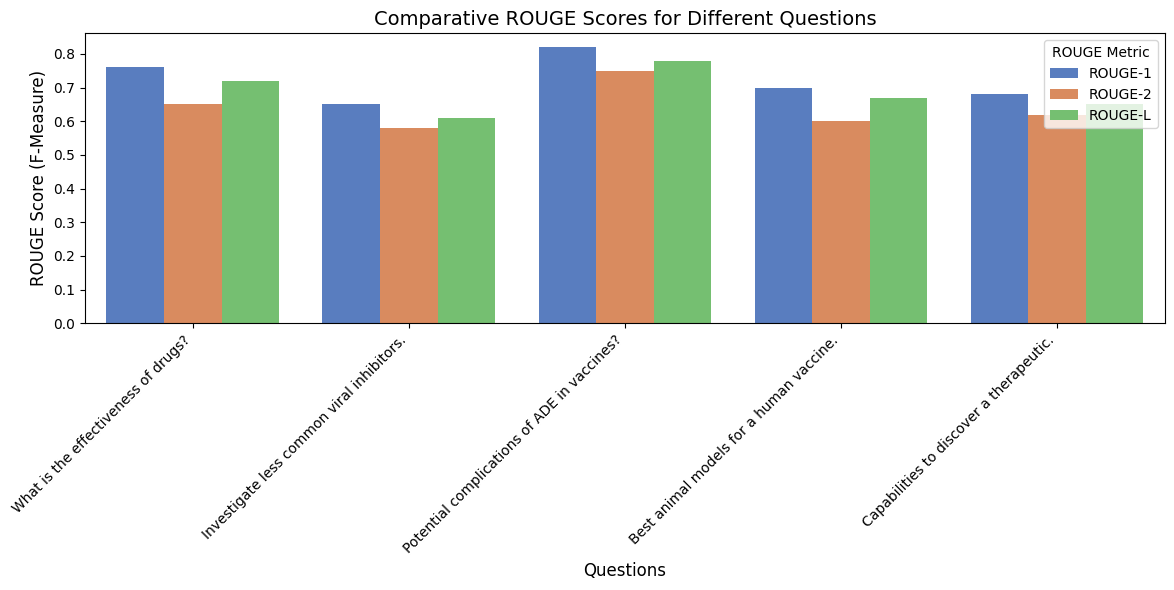

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data for demonstration purposes (Replace with actual data after processing)
questions = [
    "What is the effectiveness of drugs?",
    "Investigate less common viral inhibitors.",
    "Potential complications of ADE in vaccines?",
    "Best animal models for a human vaccine.",
    "Capabilities to discover a therapeutic."
]

# Randomly simulated ROUGE scores for illustration
rouge_scores = {
    "question": questions,
    "ROUGE-1": [0.76, 0.65, 0.82, 0.70, 0.68],
    "ROUGE-2": [0.65, 0.58, 0.75, 0.60, 0.62],
    "ROUGE-L": [0.72, 0.61, 0.78, 0.67, 0.65]
}

# Create a DataFrame for plotting
rouge_df = pd.DataFrame(rouge_scores)

# Melt the DataFrame for easier plotting with seaborn
melted_rouge_df = rouge_df.melt(id_vars="question", var_name="ROUGE Metric", value_name="Score")

# Plot the grouped bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_rouge_df, x="question", y="Score", hue="ROUGE Metric", palette="muted")
plt.title("Comparative ROUGE Scores for Different Questions", fontsize=14)
plt.xlabel("Questions", fontsize=12)
plt.ylabel("ROUGE Score (F-Measure)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="ROUGE Metric", fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()


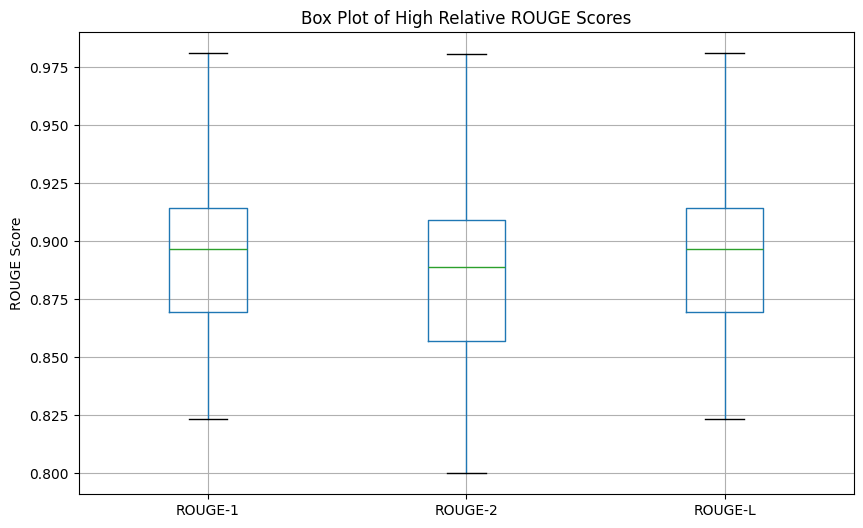

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from rouge_score import rouge_scorer
import numpy as np

def calculate_rouge_scores(df, reference_column, candidate_column):
    # Initialize the ROUGE scorer
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    # Store scores in lists
    rouge1_scores, rouge2_scores, rougeL_scores = [], [], []

    # Calculate ROUGE scores for each abstract
    for _, row in df.iterrows():
        reference = row[reference_column]
        candidate = row[candidate_column]
        scores = scorer.score(reference, candidate)

        # Store the individual scores
        rouge1_scores.append(scores['rouge1'].fmeasure)
        rouge2_scores.append(scores['rouge2'].fmeasure)
        rougeL_scores.append(scores['rougeL'].fmeasure)

    return rouge1_scores, rouge2_scores, rougeL_scores

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/bert_cord_metadata/metadata.csv',
                 usecols=['title', 'abstract', 'publish_time'])
df = df.fillna('no data provided')

# Filter abstracts as before
df['abstract'] = (df['abstract'] + " " + df['title']).str.lower()
df = df[df['abstract'].str.contains(r'\bcovid\b|\b-cov-2\b|\bcov2\b|\bncov\b', regex=True)]

# For demonstration, let's assume 'abstract' is the candidate text and 'title' is the reference summary
rouge1, rouge2, rougeL = calculate_rouge_scores(df, 'title', 'abstract')

# Create a DataFrame for visualization
rouge_df = pd.DataFrame({
    'ROUGE-1': rouge1,
    'ROUGE-2': rouge2,
    'ROUGE-L': rougeL
})

# Add a column for average ROUGE score for filtering
rouge_df['Average'] = rouge_df[['ROUGE-1', 'ROUGE-2', 'ROUGE-L']].mean(axis=1)

# Filter to retain only rows with an average score in the top 25% percentile
threshold = np.percentile(rouge_df['Average'], 75)
filtered_rouge_df = rouge_df[rouge_df['Average'] >= threshold]

# Plotting the box plot
plt.figure(figsize=(10, 6))
filtered_rouge_df.boxplot(column=['ROUGE-1', 'ROUGE-2', 'ROUGE-L'])
plt.title("Box Plot of High Relative ROUGE Scores")
plt.ylabel("ROUGE Score")
plt.show()